In [1]:
from chp4_sur import SurnamesDataset, SurnamesVectorizer
import torch
from torch import nn
import torch.nn.functional as F
import pdb

In [2]:
filename = './data/data/names/full_dataset.csv'
dataset = SurnamesDataset.load_dataset_and_make_vectorizer(filename)
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

In [3]:
device

device(type='cuda', index=0)

In [4]:
dataset.input_size()

87

In [5]:
dataset.output_size()

18

In [6]:
dataset.get_item(0)

Unnamed: 0        5040
surname           Last
nationality    English
split            train
Name: 0, dtype: object

In [7]:
dataset.head(2)

{'idx': 0, 'x_data': tensor([0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0'), 'y_target': tensor([0], device='cuda:0')}
{'idx': 1, 'x_data': tensor([0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0'), 'y_target': tensor([1], device='cuda:0')}


In [33]:
class SurnamesMLP(nn.Module):
    def __init__(self, input_vocab_size, hidden_size, output_vocab_size):
        super(SurnamesMLP, self).__init__()
        self.fc1 = nn.Linear(input_vocab_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_vocab_size)
        
    def forward(self, input_vec, apply_softmax=True):
        hidden = F.relu(self.fc1(input_vec))
        output = F.dropout(self.fc2(hidden), .5)
        if apply_softmax == True:
            output = torch.softmax(output, dim=1)
        return output

In [34]:
model = SurnamesMLP(dataset.input_size(), 10, dataset.output_size()).to(device)

In [35]:
print(model)

SurnamesMLP(
  (fc1): Linear(in_features=87, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=18, bias=True)
)


In [36]:
x_data_from_dataset = next(iter(dataset))['x_data'].to(device)
y_target_from_dataset = next(iter(dataset))['y_target'].to(device)
x_data_from_dataset, y_target_from_dataset

(tensor([0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        device='cuda:0'), tensor([11], device='cuda:0'))

In [37]:
from torch.utils.data import DataLoader
dataloader = DataLoader(dataset=dataset, batch_size=4, 
                        drop_last=False, shuffle=True)

In [38]:
sample = next(iter(dataloader))
x_data = sample['x_data']
y_target = sample['y_target']
x_data, y_target

(tensor([[0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
          0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
          0., 0., 0., 0., 0., 0., 0., 

In [39]:
y_pred = model(x_data, apply_softmax=False)
print(y_pred)
print(y_target.view(-1))

tensor([[-0.0648,  0.1412,  0.2989,  0.0212,  0.0881, -0.1492, -0.1143,  0.2394,
          0.1283,  0.2644,  0.3406, -0.2151, -0.1421, -0.1582, -0.2191,  0.0995,
         -0.2002,  0.1542],
        [ 0.0092,  0.1243,  0.2937, -0.0371,  0.0606, -0.1154, -0.1205,  0.2654,
          0.1809,  0.2089,  0.2895, -0.2836, -0.2014, -0.1898, -0.2572,  0.1311,
         -0.2275,  0.1046],
        [-0.0575,  0.1795,  0.3181, -0.0843,  0.0304, -0.1182, -0.1482,  0.2736,
          0.2335,  0.2542,  0.2939, -0.3368, -0.1505, -0.1989, -0.2271,  0.1226,
         -0.1813,  0.1149],
        [-0.0658,  0.1971,  0.2967, -0.0368,  0.0371, -0.1569, -0.1764,  0.2122,
          0.1610,  0.2752,  0.2742, -0.2954, -0.1391, -0.2159, -0.2168,  0.0799,
         -0.1667,  0.0926]], device='cuda:0', grad_fn=<DropoutBackward>)
tensor([8, 1, 8, 1], device='cuda:0')


In [40]:
ce_loss = nn.CrossEntropyLoss()

In [41]:
ce_loss(y_pred, y_target.view(-1))

tensor(2.7551, device='cuda:0', grad_fn=<NllLossBackward>)

In [42]:
# Manual check:
sf_mx = torch.softmax(y_pred, dim=1)
torch.mean(-torch.log(torch.tensor([sf_mx[i, val.item()] for i, val in enumerate(y_target)])))

tensor(2.7551)

In [43]:
from torch.optim import Adam
from tqdm import tqdm as tqdm
import pdb

In [44]:
model = SurnamesMLP(dataset.input_size(), 300, dataset.output_size()).to(device)
optim = Adam(params=model.parameters(), lr=0.001)

In [45]:
def run_batch(model, dataset, batch_type, batch_size, debug=False):
    
    if debug: pdb.set_trace()

    dataset.set_split(batch_type)
    dataloader = DataLoader(dataset=dataset, batch_size=batch_size, 
                            drop_last=False, shuffle=True)

    running_loss = 0
    running_acc = 0

    if batch_type == 'train':
        model.train()
    else:
        model.eval()

    #for sample in tqdm(dataloader, desc='{:<{w}}'.format(batch_type, w=6)):
    for sample in dataloader:

        if model.training:
            model.zero_grad()

        x_data = sample['x_data']
        y_target = sample['y_target']

        y_pred = model(x_data, apply_softmax=False)
        loss = ce_loss(y_pred, y_target.view(-1))

        _, idx = torch.topk(torch.softmax(y_pred, dim=1), 1)
        acc = torch.sum(y_target == idx).float()

        if model.training:
            loss.backward()
            optim.step()

        running_loss += loss.to('cpu') * x_data.shape[0]
        running_acc += acc

    running_loss /= len(dataset)
    running_acc /= len(dataset)
    
    return round(running_loss.item(),4), round(running_acc.item(),4)

In [21]:
hist = []

In [46]:
num_epochs = 120
for epoch in range(num_epochs):
    tr_loss, tr_acc = run_batch(model, dataset, 'train', 200)
    val_loss, val_acc = run_batch(model, dataset, 'val', 200)
    print('{} / {} :'.format(epoch+1, num_epochs), (tr_loss, tr_acc), (val_loss, val_acc))
    hist.append([tr_loss, tr_acc, val_loss, val_acc])

1 / 120 : (2.3246, 0.3408) (2.0042, 0.4439)
2 / 120 : (1.8391, 0.4828) (1.7036, 0.5024)
3 / 120 : (1.6122, 0.5234) (1.5512, 0.5351)
4 / 120 : (1.4892, 0.5494) (1.4601, 0.5522)
5 / 120 : (1.4055, 0.5674) (1.3968, 0.5634)
6 / 120 : (1.3462, 0.58) (1.3507, 0.579)
7 / 120 : (1.2995, 0.597) (1.3174, 0.5888)
8 / 120 : (1.2616, 0.6034) (1.286, 0.5937)
9 / 120 : (1.2289, 0.6123) (1.2581, 0.6127)
10 / 120 : (1.2014, 0.622) (1.2377, 0.6146)
11 / 120 : (1.1738, 0.632) (1.2222, 0.6254)
12 / 120 : (1.1499, 0.6427) (1.2065, 0.6288)
13 / 120 : (1.131, 0.6474) (1.1882, 0.6395)
14 / 120 : (1.1098, 0.655) (1.179, 0.6463)
15 / 120 : (1.0924, 0.6619) (1.1633, 0.6454)
16 / 120 : (1.0747, 0.668) (1.1536, 0.6537)
17 / 120 : (1.0588, 0.6738) (1.1428, 0.6561)
18 / 120 : (1.0452, 0.6811) (1.1341, 0.6541)
19 / 120 : (1.0309, 0.6803) (1.1267, 0.6605)
20 / 120 : (1.0182, 0.6867) (1.1195, 0.658)
21 / 120 : (1.0035, 0.6896) (1.1102, 0.6615)
22 / 120 : (0.9919, 0.6931) (1.1048, 0.6659)
23 / 120 : (0.9804, 0.6962) (1.

In [47]:
import matplotlib.pyplot as plt
import numpy as np

In [48]:
plt_hist = np.array(hist)

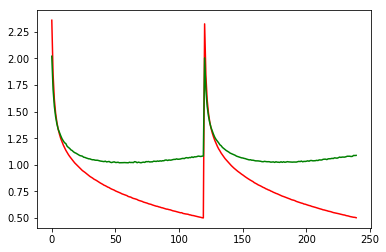

In [49]:
plt.plot(plt_hist[:,0], 'r', plt_hist[:,2], 'g')

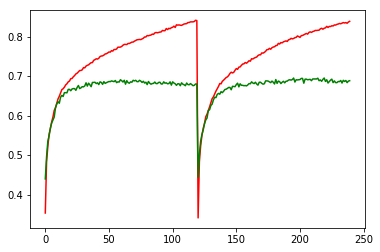

In [50]:
plt.plot(plt_hist[:,1], 'r', plt_hist[:,3], 'g')

In [51]:
run_batch(model, dataset, 'test', 512)

(1.1273, 0.678)

In [52]:
def predict_nationality(surname):
    x_data = torch.tensor(dataset._vectorizer.vectorize(surname)).float().view(1,-1).to(device)
    y_pred = model(x_data, apply_softmax=True)
    probs, idx = y_pred.topk(5)
    topk = list(idx.squeeze().cpu().numpy())
    for i, k in enumerate(topk):
        print('{} {:2.0%}'.format(
            dataset._vectorizer.nationality_vocab.lookup_index(k),
            probs[0,i].item()))

In [53]:
predict_nationality('Bagmevsky')

Russian 100%
Greek 0%
English 0%
Czech 0%
German 0%


In [58]:
predict_nationality('O\'Neil')

Irish 100%
Italian 0%
Spanish 0%
Russian 0%
French 0%


In [55]:
predict_nationality('Oliveira')

English 46%
Spanish 34%
French 16%
Italian 1%
German 1%
